In [39]:
%matplotlib inline
import urllib.request 
import json, datetime, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 일별 박스오피스
def cineBoxInfo():
    #오늘 날짜를 가져와서 사용할 형식으로 만든다.
    movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
    
    cine=[]
    for i in range(0,30):
        #자료는 매일 갱신되며 갱신 시간이전에 요청시 내용이 비어 있음.
        #반복 함수 마지막에 날짜를 줄이는 함수를 사용한다.
        #str -> date
        datetime_obj = datetime.datetime.strptime(movieDate,"%Y%m%d").date()

        # 1일 혹은 1주일씩 시간을 줄여간다.
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)  #weeks=1
        
        #date -> str
        movieDate = datetime_obj_tmp.strftime("%Y%m%d")
        print(movieDate)
        
        url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
        response =urllib.request.urlopen(url)
        #print(response)
        
        rescode = response.getcode()
        if(rescode == 200):
            responseData = response.read()

        result = json.loads(responseData)
        #print(result)
        pre_result = result["boxOfficeResult"]["dailyBoxOfficeList"]
        #print(pre_result)     
        
        for i in range(0,len(pre_result)):
            pre_result[i]['targetDt']=movieDate
            cine.append(pre_result[i])
      
    #print(cine)    
    dataframe=pd.DataFrame(cine)
    dataframe.to_csv("cinebox.csv")
    
# 영화상세정보
def cineInfo(movieCd):
    url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=66e652e1d2656b42f10d93c91e0295e4&movieCd="+str(movieCd)
    response = urllib.request.urlopen(url)
    text = response.read()
    #print(text)
    d = json.loads(text)
    #print(d)
    movieInfo = d['movieInfoResult']['movieInfo']
    return movieInfo


In [4]:
cineBoxInfo()

20191002
20191001
20190930
20190929
20190928
20190927
20190926
20190925
20190924
20190923
20190922
20190921
20190920
20190919
20190918
20190917
20190916
20190915
20190914
20190913
20190912
20190911
20190910
20190909
20190908
20190907
20190906
20190905
20190904
20190903


In [5]:
# 영화코드를 인자로 받아 영화상세정보 리턴
movieInfo = cineInfo(20193601)
print(movieInfo['movieCd'],
      movieInfo['movieNm'],
      movieInfo['showTm'],
      len(movieInfo['actors']),
      len(movieInfo['showTypes']))

20193601 장사리 : 잊혀진 영웅들 103 11 1


In [6]:
# 필요한 영화 코드
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
codeitem = pd.unique(df['movieCd']).tolist()
print(codeitem)   

cine=[]
for code in codeitem:
    movieInfo = cineInfo(code)
    item={'movieCd':movieInfo['movieCd'],'movieNm':movieInfo['movieNm'],'showTm':movieInfo['showTm'],'actors':len(movieInfo['actors']),'showTypes':len(movieInfo['showTypes'])}
    cine.append(item)
    
dataframe=pd.DataFrame(cine)
dataframe.to_csv("cine.csv")         

[20199950, 20195920, 20184483, 20193601, 20194456, 20188750, 20199446, 20195941, 20181103, 20192982, 20184572, 20193807, 20195968, 20195203, 20193821, 20187322, 20192804, 20184621, 20194943, 20195202, 20189077, 20181416, 20198323, 20196850, 20194045, 20194442, 20184543, 20193665, 20184462, 20194541, 20185985, 20194384]


양자물리학
Index(['Unnamed: 0', 'audiAcc', 'audiChange', 'audiCnt', 'audiInten',
       'movieCd', 'movieNm', 'openDt', 'rank', 'rankInten', 'rankOldAndNew',
       'rnum', 'salesAcc', 'salesAmt', 'salesChange', 'salesInten',
       'salesShare', 'scrnCnt', 'showCnt', 'targetDt'],
      dtype='object')
   Unnamed: 0  audiAcc  audiChange  audiCnt  audiInten    ...     salesInten salesShare scrnCnt  showCnt  targetDt
0           0   326210     11781.3   323408     320686    ...     2653411490       52.7    1192     5576  20191002
1           1   154448      9452.1   145574     144050    ...     1143793840       22.7    1006     4912  20191002
2           2   176452      2033.0    77448      73817    ...      582036440       12.0     894     3704  20191002
3           3   860306       -43.2    36505     -27809    ...     -212669920        5.4     673     1792  20191002
4           4   497789       -71.6    13226     -33266    ...     -263981650        2.0     509     1055  20191002

[5 rows x 

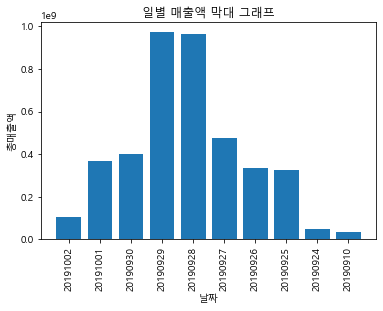

In [7]:
def graph_m(title):
    df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
    print(title)
    print(df.columns)
    print(df.head())
    temp = df[df['movieNm'] == title]
    #print(temp[['salesAmt','targetDt','movieNm']])
    #print(temp.dtypes)
    mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
    plt.bar(temp['targetDt'].astype(str),temp['salesAmt']) 
    plt.title('일별 매출액 막대 그래프')
    plt.xlabel('날짜')
    plt.ylabel('총매출액')
    plt.xticks(fontsize=10, rotation=90)
    url1="" + title + ".png"
    plt.savefig(url1)

if __name__ == "__main__":
    graph_m("양자물리학")

In [8]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')

print(df.head())

   Unnamed: 0  audiAcc  audiChange  audiCnt  audiInten    ...     salesInten salesShare scrnCnt  showCnt  targetDt
0           0   326210     11781.3   323408     320686    ...     2653411490       52.7    1192     5576  20191002
1           1   154448      9452.1   145574     144050    ...     1143793840       22.7    1006     4912  20191002
2           2   176452      2033.0    77448      73817    ...      582036440       12.0     894     3704  20191002
3           3   860306       -43.2    36505     -27809    ...     -212669920        5.4     673     1792  20191002
4           4   497789       -71.6    13226     -33266    ...     -263981650        2.0     509     1055  20191002

[5 rows x 20 columns]


In [9]:
temp1 = df[df['movieNm'] == '엑시트']
temp1.head()

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
108,108,9407848,-16.1,3421,-657,20184621,엑시트,2019-07-31,9,0,OLD,9,79107385402,28623880,-15.5,-5249320,0.6,140,184,20190922
118,118,9404427,160.7,4078,2514,20184621,엑시트,2019-07-31,9,2,OLD,9,79078761522,33873200,163.9,21036480,0.6,152,204,20190921
149,149,9397389,-33.0,2136,-1052,20184621,엑시트,2019-07-31,10,-2,OLD,10,79021343072,16817410,-32.9,-8245680,0.8,222,383,20190918
157,157,9395253,-36.0,3188,-1791,20184621,엑시트,2019-07-31,8,-2,OLD,8,79004525662,25063090,-36.7,-14550920,1.1,333,560,20190917
165,165,9392065,-75.9,4979,-15689,20184621,엑시트,2019-07-31,6,-1,OLD,6,78979462572,39614010,-78.1,-141414050,1.4,352,622,20190916


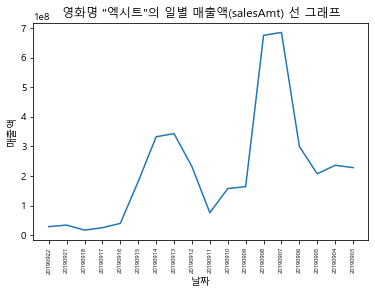

In [10]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
plt.title('영화명 "엑시트"의 일별 매출액(salesAmt) 선 그래프')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=6, rotation=90)
plt.show()

In [11]:
temp = df.groupby('movieNm').sum()
print(temp)

                      Unnamed: 0    audiAcc  audiChange  audiCnt    ...      salesShare  scrnCnt  showCnt   targetDt
movieNm                                                             ...                                             
47미터 2                      2086    3235904        -9.6   122492    ...            41.7     4076     9341  161527252
가장 보통의 연애                     89     158196      9552.1   148921    ...            24.5     1021     4930   40381926
광대들: 풍문조작단                   845    1855006        59.1    16357    ...             5.3      884     1451   60572714
그것: 두 번째 이야기                3723    9196222     14574.8   586716    ...           166.3     9410    25286  403818275
극장판 반지의 비밀일기                 984     148758      1099.8    52655    ...             4.1     1960     2553  100954565
극장판 헬로카봇 : 달나라를 구해줘!        3888    8763325     21026.6   570931    ...            95.0    10131    19491  444200127
나쁜 녀석들: 더 무비                3087   73302419      4330.8  4517944

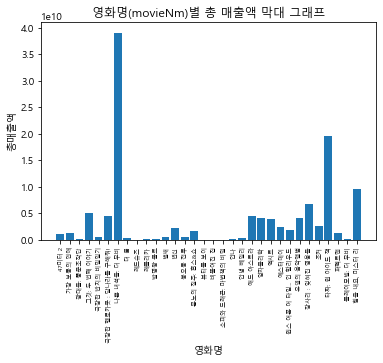

In [12]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.bar(temp.index, temp['salesAmt']) 
plt.title('영화명(movieNm)별 총 매출액 막대 그래프')
plt.xlabel('영화명')
plt.ylabel('총매출액')
plt.xticks(fontsize=6, rotation=90)
plt.show()

- 분포도 그리기

In [13]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')

temp = df.groupby('movieNm').sum()
print(temp.head())

              Unnamed: 0  audiAcc  audiChange  audiCnt    ...      salesShare  scrnCnt  showCnt   targetDt
movieNm                                                   ...                                             
47미터 2              2086  3235904        -9.6   122492    ...            41.7     4076     9341  161527252
가장 보통의 연애             89   158196      9552.1   148921    ...            24.5     1021     4930   40381926
광대들: 풍문조작단           845  1855006        59.1    16357    ...             5.3      884     1451   60572714
그것: 두 번째 이야기        3723  9196222     14574.8   586716    ...           166.3     9410    25286  403818275
극장판 반지의 비밀일기         984   148758      1099.8    52655    ...             4.1     1960     2553  100954565

[5 rows x 17 columns]


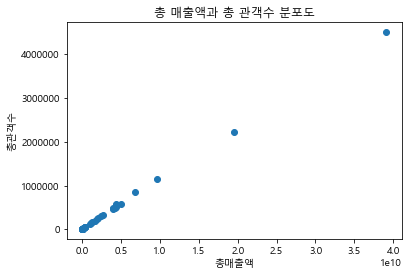

In [14]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.title('총 매출액과 총 관객수 분포도')
plt.xlabel('총매출액')
plt.ylabel('총관객수')
plt.show()

- 파이차트 그리기

In [15]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp = temp.sort_values(by='salesAmt', ascending=0)
temp = temp.iloc[:10]
print(temp)

                      Unnamed: 0    audiAcc  audiChange  audiCnt    ...      salesShare  scrnCnt  showCnt   targetDt
movieNm                                                             ...                                             
나쁜 녀석들: 더 무비                3087   73302419      4330.8  4517944    ...           758.5    24074   110413  504773135
타짜: 원 아이드 잭                 2634   38450737     42058.2  2213676    ...           318.0    18057    65834  444200317
힘을 내요, 미스터 리                2845   15331429      6236.0  1139530    ...           146.6    11469    40423  383627432
장사리 : 잊혀진 영웅들                499    4282418      4303.4   857422    ...           225.6     7862    33998  201909412
그것: 두 번째 이야기                3723    9196222     14574.8   586716    ...           166.3     9410    25286  403818275
극장판 헬로카봇 : 달나라를 구해줘!        3888    8763325     21026.6   570931    ...            95.0    10131    19491  444200127
애드 아스트라                      953    5329740      2402.0   500392

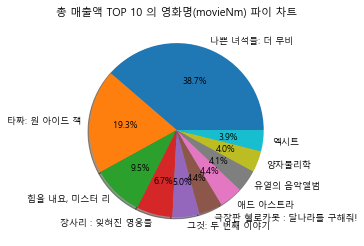

In [16]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
plt.pie(temp['salesAmt'], labels=temp.index, autopct='%.1f%%', shadow=True)
plt.title('총 매출액 TOP 10 의 영화명(movieNm) 파이 차트')
plt.show()

In [23]:
df1 = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df2 = pd.read_csv(r'cine.csv',engine='python',encoding='utf-8')
df3 = pd.merge(df1, df2, on='movieCd') 
df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1], inplace=True)

temp = df3.corr()
temp

,Unnamed: 0_x,audiAcc,audiChange,audiCnt,audiInten,movieCd,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,Unnamed: 0_y,actors,showTm,showTypes
Unnamed: 0_x,1.000000,0.188587,0.038487,0.020407,0.008532,-0.258042,0.033166,0.033308,-0.007117,0.033166,0.186430,0.027052,0.041506,0.012938,-0.028445,0.024255,-0.027814,-0.716784,0.683448,0.005029,-0.037238,0.255978
audiAcc,0.188587,1.000000,-0.087793,0.027911,-0.096400,-0.329373,-0.117976,-0.146995,-0.138756,-0.117976,0.999750,0.028585,-0.078113,-0.095058,0.088600,0.138000,0.108576,-0.130568,0.190891,0.223453,-0.045926,0.670645
audiChange,0.038487,-0.087793,1.000000,0.193370,0.457221,0.044511,-0.159192,0.633305,-0.027929,-0.159192,-0.088838,0.171625,0.987954,0.422515,0.242131,0.188085,0.196767,0.026126,-0.079502,0.035636,0.023652,-0.032977
audiCnt,0.020407,0.027911,0.193370,1.000000,0.321032,-0.047162,-0.543191,0.050448,-0.100337,-0.543191,0.033705,0.998388,0.196167,0.318838,0.768942,0.696881,0.763445,-0.029261,-0.265223,0.080978,0.029819,0.002924
audiInten,0.008532,-0.096400,0.457221,0.321032,1.000000,0.056098,-0.079122,0.276521,0.013086,-0.079122,-0.099524,0.310374,0.448971,0.993133,0.139828,0.094803,0.116856,0.068755,-0.072895,-0.023012,-0.003514,-0.023488
movieCd,-0.258042,-0.329373,0.044511,-0.047162,0.056098,1.000000,0.011423,0.119174,0.090710,0.011423,-0.327967,-0.052694,0.022292,0.052671,-0.010730,-0.002877,-0.052796,0.206888,-0.050983,-0.240089,-0.143946,-0.253778
rank,0.033166,-0.117976,-0.159192,-0.543191,-0.079122,0.011423,1.000000,-0.044897,0.170564,1.000000,-0.122981,-0.524211,-0.147464,-0.072193,-0.801312,-0.871671,-0.851765,0.000000,0.302706,-0.136856,-0.144995,-0.139506
rankInten,0.033308,-0.146995,0.633305,0.050448,0.276521,0.119174,-0.044897,1.000000,-0.044449,-0.044897,-0.148102,0.038489,0.572395,0.250684,0.085495,0.016252,0.051960,-0.008572,-0.094232,-0.032471,-0.078831,-0.084573
rankOldAndNew,-0.007117,-0.138756,-0.027929,-0.100337,0.013086,0.090710,0.170564,-0.044449,1.000000,0.170564,-0.139592,-0.096611,-0.025573,0.012019,-0.149756,-0.237519,-0.190447,0.008160,-0.076952,-0.175602,-0.081498,-0.154959
rnum,0.033166,-0.117976,-0.159192,-0.543191,-0.079122,0.011423,1.000000,-0.044897,0.170564,1.000000,-0.122981,-0.524211,-0.147464,-0.072193,-0.801312,-0.871671,-0.851765,0.000000,0.302706,-0.136856,-0.144995,-0.139506


In [21]:
temp = temp.rename(index={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp = temp.rename(columns={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp

,Unnamed: 0_x,audiAcc,audiChange,관객수,audiInten,영화코드,순위,rankInten,신규진입여부,rnum,salesAcc,매출액,salesChange,salesInten,salesShare,scrnCnt,showCnt,날짜,Unnamed: 0_y,배우 수,상영시간,상영형태 수
Unnamed: 0_x,1.000000,0.188587,0.038487,0.020407,0.008532,-0.258042,0.033166,0.033308,-0.007117,0.033166,0.186430,0.027052,0.041506,0.012938,-0.028445,0.024255,-0.027814,-0.716784,0.683448,0.005029,-0.037238,0.255978
audiAcc,0.188587,1.000000,-0.087793,0.027911,-0.096400,-0.329373,-0.117976,-0.146995,-0.138756,-0.117976,0.999750,0.028585,-0.078113,-0.095058,0.088600,0.138000,0.108576,-0.130568,0.190891,0.223453,-0.045926,0.670645
audiChange,0.038487,-0.087793,1.000000,0.193370,0.457221,0.044511,-0.159192,0.633305,-0.027929,-0.159192,-0.088838,0.171625,0.987954,0.422515,0.242131,0.188085,0.196767,0.026126,-0.079502,0.035636,0.023652,-0.032977
관객수,0.020407,0.027911,0.193370,1.000000,0.321032,-0.047162,-0.543191,0.050448,-0.100337,-0.543191,0.033705,0.998388,0.196167,0.318838,0.768942,0.696881,0.763445,-0.029261,-0.265223,0.080978,0.029819,0.002924
audiInten,0.008532,-0.096400,0.457221,0.321032,1.000000,0.056098,-0.079122,0.276521,0.013086,-0.079122,-0.099524,0.310374,0.448971,0.993133,0.139828,0.094803,0.116856,0.068755,-0.072895,-0.023012,-0.003514,-0.023488
영화코드,-0.258042,-0.329373,0.044511,-0.047162,0.056098,1.000000,0.011423,0.119174,0.090710,0.011423,-0.327967,-0.052694,0.022292,0.052671,-0.010730,-0.002877,-0.052796,0.206888,-0.050983,-0.240089,-0.143946,-0.253778
순위,0.033166,-0.117976,-0.159192,-0.543191,-0.079122,0.011423,1.000000,-0.044897,0.170564,1.000000,-0.122981,-0.524211,-0.147464,-0.072193,-0.801312,-0.871671,-0.851765,0.000000,0.302706,-0.136856,-0.144995,-0.139506
rankInten,0.033308,-0.146995,0.633305,0.050448,0.276521,0.119174,-0.044897,1.000000,-0.044449,-0.044897,-0.148102,0.038489,0.572395,0.250684,0.085495,0.016252,0.051960,-0.008572,-0.094232,-0.032471,-0.078831,-0.084573
신규진입여부,-0.007117,-0.138756,-0.027929,-0.100337,0.013086,0.090710,0.170564,-0.044449,1.000000,0.170564,-0.139592,-0.096611,-0.025573,0.012019,-0.149756,-0.237519,-0.190447,0.008160,-0.076952,-0.175602,-0.081498,-0.154959
rnum,0.033166,-0.117976,-0.159192,-0.543191,-0.079122,0.011423,1.000000,-0.044897,0.170564,1.000000,-0.122981,-0.524211,-0.147464,-0.072193,-0.801312,-0.871671,-0.851765,0.000000,0.302706,-0.136856,-0.144995,-0.139506


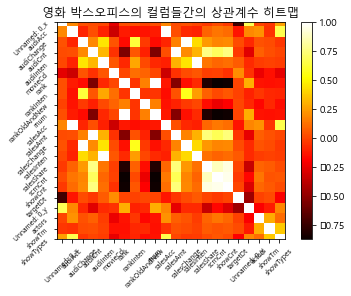

In [40]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.imshow(temp, cmap='hot')
plt.colorbar()
plt.title('영화 박스오피스의 컬럼들간의 상관계수 히트맵')
#plt.xticks(range(9), ['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes'])
plt.xticks(range(len(temp.columns)), temp.columns)
plt.xticks(fontsize=7, rotation=45)
plt.yticks(range(len(temp.index)), temp.index)
plt.yticks(fontsize=7, rotation=45)
plt.show()

In [27]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
0,0,326210,11781.3,323408,320686,20199950,조커,2019-10-02,1,11,OLD,1,2708401890,2680486690,9800.2,2653411490,52.7,1192,5576,20191002
1,1,154448,9452.1,145574,144050,20195920,가장 보통의 연애,2019-10-02,2,14,OLD,2,1225032340,1152669840,12886.4,1143793840,22.7,1006,4912,20191002
2,2,176452,2033.0,77448,73817,20184483,퍼펙트맨,2019-10-02,3,4,OLD,3,1341308460,607453440,2289.9,582036440,12.0,894,3704,20191002
3,3,860306,-43.2,36505,-27809,20193601,장사리 : 잊혀진 영웅들,2019-09-25,4,-3,OLD,4,6791439700,273787900,-43.7,-212669920,5.4,673,1792,20191002
4,4,497789,-71.6,13226,-33266,20194456,양자물리학,2019-09-25,5,-3,OLD,5,4054466930,102949640,-71.9,-263981650,2.0,509,1055,20191002
5,5,4523242,-67.2,10439,-21370,20188750,나쁜 녀석들: 더 무비,2019-09-11,6,-3,OLD,6,39159066624,82764220,-66.6,-165305570,1.6,408,825,20191002
6,6,236031,-64.2,5325,-9566,20199446,원스 어폰 어 타임... 인 할리우드,2019-09-25,7,-3,OLD,7,1906588560,43412480,-63.3,-74822760,0.9,208,356,20191002
7,7,2544,100.0,2232,2232,20195941,소피와 드래곤: 마법책의 비밀,2019-10-02,8,0,NEW,8,19063500,16255500,100.0,16255500,0.3,247,270,20191002
8,8,109840,22.3,1358,248,20181103,벌새,2019-08-29,9,10,OLD,9,899887415,10389280,21.7,1850760,0.2,58,86,20191002
9,9,502891,-82.1,1197,-5491,20192982,애드 아스트라,2019-09-19,10,-5,OLD,10,4429207560,9067480,-82.7,-43331430,0.2,56,76,20191002


In [28]:
temp1 = df[df['movieNm'] == '엑시트']
temp1

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
108,108,9407848,-16.1,3421,-657,20184621,엑시트,2019-07-31,9,0,OLD,9,79107385402,28623880,-15.5,-5249320,0.6,140,184,20190922
118,118,9404427,160.7,4078,2514,20184621,엑시트,2019-07-31,9,2,OLD,9,79078761522,33873200,163.9,21036480,0.6,152,204,20190921
149,149,9397389,-33.0,2136,-1052,20184621,엑시트,2019-07-31,10,-2,OLD,10,79021343072,16817410,-32.9,-8245680,0.8,222,383,20190918
157,157,9395253,-36.0,3188,-1791,20184621,엑시트,2019-07-31,8,-2,OLD,8,79004525662,25063090,-36.7,-14550920,1.1,333,560,20190917
165,165,9392065,-75.9,4979,-15689,20184621,엑시트,2019-07-31,6,-1,OLD,6,78979462572,39614010,-78.1,-141414050,1.4,352,622,20190916
174,174,9387086,-44.8,20668,-16751,20184621,엑시트,2019-07-31,5,0,OLD,5,78939848562,181028060,-45.5,-151254990,1.9,388,675,20190915
184,184,9366418,-1.1,37419,-416,20184621,엑시트,2019-07-31,5,-1,OLD,5,78758820502,332283050,-3.1,-10654630,2.4,404,703,20190914
193,193,9328999,46.4,37835,11998,20184621,엑시트,2019-07-31,4,1,OLD,4,78426537452,342937680,48.3,111703390,2.7,374,635,20190913
204,204,9291164,172.1,25837,16343,20184621,엑시트,2019-07-31,5,1,OLD,5,78083599772,231234290,205.8,155629840,2.4,350,584,20190912
215,215,9265327,-52.3,9494,-10393,20184621,엑시트,2019-07-31,6,-3,OLD,6,77852365482,75604450,-51.9,-81600710,1.3,317,565,20190911


In [29]:
temp2 = df[df['movieNm'] == '유열의 음악앨범']
temp2

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
147,147,1235490,-38.4,2202,-1370,20181416,유열의 음악앨범,2019-08-28,8,-2,OLD,8,10149534650,17632120,-39.3,-11429340,0.8,166,295,20190918
155,155,1233288,-14.2,3572,-590,20181416,유열의 음악앨범,2019-08-28,6,3,OLD,6,10131902530,29061460,-13.0,-4337550,1.3,292,511,20190917
168,168,1229716,-47.6,4162,-3782,20181416,유열의 음악앨범,2019-08-28,9,-1,OLD,9,10102841070,33399010,-52.4,-36740330,1.1,300,524,20190916
177,177,1225554,-31.2,7944,-3604,20181416,유열의 음악앨범,2019-08-28,8,0,OLD,8,10069442060,70139340,-31.6,-32456210,0.7,227,332,20190915
187,187,1217610,18.0,11548,1760,20181416,유열의 음악앨범,2019-08-28,8,-1,OLD,8,9999302720,102595550,14.9,13335810,0.8,231,354,20190914
196,196,1206062,-24.9,9788,-3238,20181416,유열의 음악앨범,2019-08-28,7,0,OLD,7,9896707170,89259740,-24.0,-28137650,0.7,263,416,20190913
206,206,1196274,10.6,13026,1248,20181416,유열의 음악앨범,2019-08-28,7,-2,OLD,7,9807447430,117397390,23.6,22427020,1.2,299,507,20190912
214,214,1183248,-55.7,11778,-14817,20181416,유열의 음악앨범,2019-08-28,5,-3,OLD,5,9690050040,94970370,-55.8,-119817270,1.7,321,658,20190911
221,221,1171470,-3.2,26595,-867,20181416,유열의 음악앨범,2019-08-28,2,0,OLD,2,9595079670,214787640,-2.5,-5533950,17.0,860,3169,20190910
231,231,1144875,-69.6,27462,-62737,20181416,유열의 음악앨범,2019-08-28,2,1,OLD,2,9380292030,220321590,-71.9,-562924780,17.8,852,3212,20190909


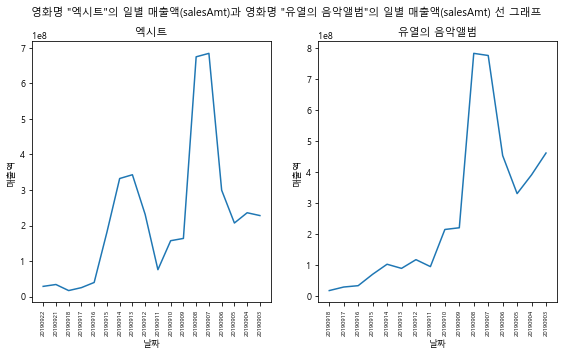

In [30]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
fig = plt.figure()
fig.set_size_inches(9.4,4.8)
#분할해 그리기 시작
axe = fig.add_subplot(1,2,1) #1행(row) 2열(column)중 첫 번째 subplot
axe.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'],label='엑시트')
axe.set_title('엑시트')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 
    tick.label.set_rotation(90)
axe = fig.add_subplot(1,2,2) #1행(row) 2열(column)중 두번째 subplot
axe.plot([str(x) for x in temp2['targetDt']], temp2['salesAmt'],label='유열의 음악앨범')
axe.set_title('유열의 음악앨범')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 
    tick.label.set_rotation(90)
plt.suptitle('영화명 "엑시트"의 일별 매출액(salesAmt)과 영화명 "유열의 음악앨범"의 일별 매출액(salesAmt) 선 그래프')
#분할해 그리기 끝
plt.show()

In [32]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
0,0,326210,11781.3,323408,320686,20199950,조커,2019-10-02,1,11,OLD,1,2708401890,2680486690,9800.2,2653411490,52.7,1192,5576,20191002
1,1,154448,9452.1,145574,144050,20195920,가장 보통의 연애,2019-10-02,2,14,OLD,2,1225032340,1152669840,12886.4,1143793840,22.7,1006,4912,20191002
2,2,176452,2033.0,77448,73817,20184483,퍼펙트맨,2019-10-02,3,4,OLD,3,1341308460,607453440,2289.9,582036440,12.0,894,3704,20191002
3,3,860306,-43.2,36505,-27809,20193601,장사리 : 잊혀진 영웅들,2019-09-25,4,-3,OLD,4,6791439700,273787900,-43.7,-212669920,5.4,673,1792,20191002
4,4,497789,-71.6,13226,-33266,20194456,양자물리학,2019-09-25,5,-3,OLD,5,4054466930,102949640,-71.9,-263981650,2.0,509,1055,20191002


In [33]:
temp1 = df[df['movieNm'] == '엑시트']
temp1.head()

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
108,108,9407848,-16.1,3421,-657,20184621,엑시트,2019-07-31,9,0,OLD,9,79107385402,28623880,-15.5,-5249320,0.6,140,184,20190922
118,118,9404427,160.7,4078,2514,20184621,엑시트,2019-07-31,9,2,OLD,9,79078761522,33873200,163.9,21036480,0.6,152,204,20190921
149,149,9397389,-33.0,2136,-1052,20184621,엑시트,2019-07-31,10,-2,OLD,10,79021343072,16817410,-32.9,-8245680,0.8,222,383,20190918
157,157,9395253,-36.0,3188,-1791,20184621,엑시트,2019-07-31,8,-2,OLD,8,79004525662,25063090,-36.7,-14550920,1.1,333,560,20190917
165,165,9392065,-75.9,4979,-15689,20184621,엑시트,2019-07-31,6,-1,OLD,6,78979462572,39614010,-78.1,-141414050,1.4,352,622,20190916


In [34]:
temp2 = df[df['movieNm'] == '유열의 음악앨범']
temp2.head()

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt
147,147,1235490,-38.4,2202,-1370,20181416,유열의 음악앨범,2019-08-28,8,-2,OLD,8,10149534650,17632120,-39.3,-11429340,0.8,166,295,20190918
155,155,1233288,-14.2,3572,-590,20181416,유열의 음악앨범,2019-08-28,6,3,OLD,6,10131902530,29061460,-13.0,-4337550,1.3,292,511,20190917
168,168,1229716,-47.6,4162,-3782,20181416,유열의 음악앨범,2019-08-28,9,-1,OLD,9,10102841070,33399010,-52.4,-36740330,1.1,300,524,20190916
177,177,1225554,-31.2,7944,-3604,20181416,유열의 음악앨범,2019-08-28,8,0,OLD,8,10069442060,70139340,-31.6,-32456210,0.7,227,332,20190915
187,187,1217610,18.0,11548,1760,20181416,유열의 음악앨범,2019-08-28,8,-1,OLD,8,9999302720,102595550,14.9,13335810,0.8,231,354,20190914


In [35]:
dates = list(set(temp1['targetDt']) | set(temp2['targetDt']))
dates.sort()
dates

[20190903,
 20190904,
 20190905,
 20190906,
 20190907,
 20190908,
 20190909,
 20190910,
 20190911,
 20190912,
 20190913,
 20190914,
 20190915,
 20190916,
 20190917,
 20190918,
 20190921,
 20190922]

In [41]:
def apply_temp1(date):
    return dates.index(date)
temp1['x'] = temp1['targetDt'].apply(apply_temp1)
temp1

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,x
108,108,9407848,-16.1,3421,-657,20184621,엑시트,2019-07-31,9,0,OLD,9,79107385402,28623880,-15.5,-5249320,0.6,140,184,20190922,17
118,118,9404427,160.7,4078,2514,20184621,엑시트,2019-07-31,9,2,OLD,9,79078761522,33873200,163.9,21036480,0.6,152,204,20190921,16
149,149,9397389,-33.0,2136,-1052,20184621,엑시트,2019-07-31,10,-2,OLD,10,79021343072,16817410,-32.9,-8245680,0.8,222,383,20190918,15
157,157,9395253,-36.0,3188,-1791,20184621,엑시트,2019-07-31,8,-2,OLD,8,79004525662,25063090,-36.7,-14550920,1.1,333,560,20190917,14
165,165,9392065,-75.9,4979,-15689,20184621,엑시트,2019-07-31,6,-1,OLD,6,78979462572,39614010,-78.1,-141414050,1.4,352,622,20190916,13
174,174,9387086,-44.8,20668,-16751,20184621,엑시트,2019-07-31,5,0,OLD,5,78939848562,181028060,-45.5,-151254990,1.9,388,675,20190915,12
184,184,9366418,-1.1,37419,-416,20184621,엑시트,2019-07-31,5,-1,OLD,5,78758820502,332283050,-3.1,-10654630,2.4,404,703,20190914,11
193,193,9328999,46.4,37835,11998,20184621,엑시트,2019-07-31,4,1,OLD,4,78426537452,342937680,48.3,111703390,2.7,374,635,20190913,10
204,204,9291164,172.1,25837,16343,20184621,엑시트,2019-07-31,5,1,OLD,5,78083599772,231234290,205.8,155629840,2.4,350,584,20190912,9
215,215,9265327,-52.3,9494,-10393,20184621,엑시트,2019-07-31,6,-3,OLD,6,77852365482,75604450,-51.9,-81600710,1.3,317,565,20190911,8


In [42]:
def apply_temp2(date):
    return dates.index(date)
temp2['x'] = temp2['targetDt'].apply(apply_temp2)
temp2

,Unnamed: 0,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,x
147,147,1235490,-38.4,2202,-1370,20181416,유열의 음악앨범,2019-08-28,8,-2,OLD,8,10149534650,17632120,-39.3,-11429340,0.8,166,295,20190918,15
155,155,1233288,-14.2,3572,-590,20181416,유열의 음악앨범,2019-08-28,6,3,OLD,6,10131902530,29061460,-13.0,-4337550,1.3,292,511,20190917,14
168,168,1229716,-47.6,4162,-3782,20181416,유열의 음악앨범,2019-08-28,9,-1,OLD,9,10102841070,33399010,-52.4,-36740330,1.1,300,524,20190916,13
177,177,1225554,-31.2,7944,-3604,20181416,유열의 음악앨범,2019-08-28,8,0,OLD,8,10069442060,70139340,-31.6,-32456210,0.7,227,332,20190915,12
187,187,1217610,18.0,11548,1760,20181416,유열의 음악앨범,2019-08-28,8,-1,OLD,8,9999302720,102595550,14.9,13335810,0.8,231,354,20190914,11
196,196,1206062,-24.9,9788,-3238,20181416,유열의 음악앨범,2019-08-28,7,0,OLD,7,9896707170,89259740,-24.0,-28137650,0.7,263,416,20190913,10
206,206,1196274,10.6,13026,1248,20181416,유열의 음악앨범,2019-08-28,7,-2,OLD,7,9807447430,117397390,23.6,22427020,1.2,299,507,20190912,9
214,214,1183248,-55.7,11778,-14817,20181416,유열의 음악앨범,2019-08-28,5,-3,OLD,5,9690050040,94970370,-55.8,-119817270,1.7,321,658,20190911,8
221,221,1171470,-3.2,26595,-867,20181416,유열의 음악앨범,2019-08-28,2,0,OLD,2,9595079670,214787640,-2.5,-5533950,17.0,860,3169,20190910,7
231,231,1144875,-69.6,27462,-62737,20181416,유열의 음악앨범,2019-08-28,2,1,OLD,2,9380292030,220321590,-71.9,-562924780,17.8,852,3212,20190909,6


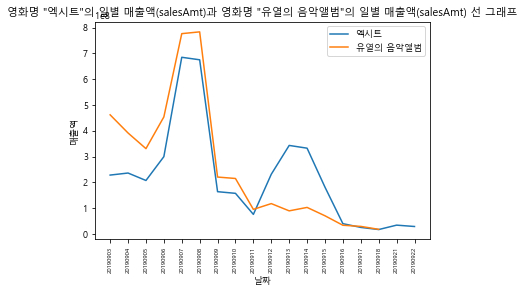

In [38]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.plot(temp1['x'], temp1['salesAmt'],label='엑시트')
plt.plot(temp2['x'], temp2['salesAmt'],label='유열의 음악앨범')
plt.title('영화명 "엑시트"의 일별 매출액(salesAmt)과 영화명 "유열의 음악앨범"의 일별 매출액(salesAmt) 선 그래프')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(range(len(dates)),dates, fontsize=6, rotation=90)
plt.legend(loc=1) #범례
plt.show()